# Outranking algorithms

This notebook is dedicated to the use of outranking algorithms, including the different ELECTRE algorithms and Promethee algorithms.

In [1]:
%matplotlib notebook
%config Completer.use_jedi = False

## Outranking problem formalization

In [2]:
from pandas import DataFrame, Series
from mcda.core.performance_table import *
from mcda.core.scales import *
from mcda.outranking.utils import *
import mcda.outranking.electre1 as electre1
import mcda.outranking.electre2 as electre2
import mcda.outranking.electre3 as electre3
from mcda.plot.plot import plot_outranking

In [3]:
#Parameters 
alternatives = ["Peugeot 505 GR",
    "Opel Record 2000 LS",
    "Citroen Visa Super E",
    "VW Golf 1300 GLS",
    "Citroen CX 2400 Pallas"]
dataset = DataFrame([
        [1, 2, 1, 5, 2, 2, 4],  # a1
        [3, 5, 3, 5, 3, 3, 3],  # a2
        [3, 5, 3, 5, 3, 2, 2],  # a3
        [1, 2, 2, 5, 1, 1, 1],  # a4
        [1, 1, 3, 5, 4, 1, 5],  # a5
], index=alternatives)
scale = {
    0: QuantitativeScale(1, 3),
    1: QuantitativeScale(1, 5),
    2: QuantitativeScale(1, 3),
    3: QuantitativeScale(1, 5),
    4: QuantitativeScale(1, 5),
    5: QuantitativeScale(1, 3),
    6: QuantitativeScale(1, 5),
}
W = {
    0: 0.780, 1: 1.180, 2: 1.570, 3: 3.140,
    4: 2.350, 5: 0.390, 6: 0.590}
c_hat = 0.75
d_hat = 0.50

## concordance matrix

In [4]:
electre1.concordance(dataset, W, scale)

Peugeot 505 GR  Opel Record 2000 LS  \
Peugeot 505 GR                   1.000                0.373   
Opel Record 2000 LS              0.941                1.000   
Citroen Visa Super E             0.941                0.902   
VW Golf 1300 GLS                 0.667                0.314   
Citroen CX 2400 Pallas           0.843                0.765   

                        Citroen Visa Super E  VW Golf 1300 GLS  \
Peugeot 505 GR                         0.412             0.843   
Opel Record 2000 LS                    1.000             1.000   
Citroen Visa Super E                   1.000             1.000   
VW Golf 1300 GLS                       0.314             1.000   
Citroen CX 2400 Pallas                 0.765             0.882   

                        Citroen CX 2400 Pallas  
Peugeot 505 GR                           0.549  
Opel Record 2000 LS                      0.706  
Citroen Visa Super E                     0.706  
VW Golf 1300 GLS                         0.549  
Citroen CX 2400 Pallas                   1.000

In [5]:
scale[0] = QuantitativeScale(1, 3, PreferenceDirection.MIN)
electre1.concordance(dataset, W, scale)

Peugeot 505 GR  Opel Record 2000 LS  \
Peugeot 505 GR                   1.000                0.451   
Opel Record 2000 LS              0.863                1.000   
Citroen Visa Super E             0.863                0.902   
VW Golf 1300 GLS                 0.667                0.392   
Citroen CX 2400 Pallas           0.843                0.843   

                        Citroen Visa Super E  VW Golf 1300 GLS  \
Peugeot 505 GR                         0.490             0.843   
Opel Record 2000 LS                    1.000             0.922   
Citroen Visa Super E                   1.000             0.922   
VW Golf 1300 GLS                       0.392             1.000   
Citroen CX 2400 Pallas                 0.843             0.882   

                        Citroen CX 2400 Pallas  
Peugeot 505 GR                           0.549  
Opel Record 2000 LS                      0.628  
Citroen Visa Super E                     0.628  
VW Golf 1300 GLS                         0.549  
Citroen CX 2400 Pallas                   1.000

## discordance matrix

In [6]:
electre1.discordance(dataset, scale)

Peugeot 505 GR  Opel Record 2000 LS  \
Peugeot 505 GR                    0.00                 0.75   
Opel Record 2000 LS               0.50                 0.00   
Citroen Visa Super E              0.50                 0.25   
VW Golf 1300 GLS                  0.75                 0.75   
Citroen CX 2400 Pallas            0.25                 1.00   

                        Citroen Visa Super E  VW Golf 1300 GLS  \
Peugeot 505 GR                          0.75              0.25   
Opel Record 2000 LS                     0.00              0.50   
Citroen Visa Super E                    0.00              0.50   
VW Golf 1300 GLS                        0.75              0.00   
Citroen CX 2400 Pallas                  1.00              0.25   

                        Citroen CX 2400 Pallas  
Peugeot 505 GR                            0.50  
Opel Record 2000 LS                       0.50  
Citroen Visa Super E                      0.75  
VW Golf 1300 GLS                          1.00  
Citroen CX 2400 Pallas                    0.00

## outranking matrix

In [7]:
outranking_matrix = electre1.outranking(electre1.concordance(dataset, W, scale), electre1.discordance(dataset, scale), c_hat, d_hat)
outranking_matrix

Peugeot 505 GR  Opel Record 2000 LS  \
Peugeot 505 GR                     1.0                  0.0   
Opel Record 2000 LS                1.0                  1.0   
Citroen Visa Super E               1.0                  1.0   
VW Golf 1300 GLS                   0.0                  0.0   
Citroen CX 2400 Pallas             1.0                  0.0   

                        Citroen Visa Super E  VW Golf 1300 GLS  \
Peugeot 505 GR                           0.0                 1   
Opel Record 2000 LS                      1.0                 1   
Citroen Visa Super E                     1.0                 1   
VW Golf 1300 GLS                         0.0                 1   
Citroen CX 2400 Pallas                   0.0                 1   

                        Citroen CX 2400 Pallas  
Peugeot 505 GR                             0.0  
Opel Record 2000 LS                        0.0  
Citroen Visa Super E                       0.0  
VW Golf 1300 GLS                           0.0  
Citroen CX 2400 Pallas                     1.0

In [8]:
matrix_to_relations(outranking_matrix)

/home/nduminy/.pyenv/versions/3.6.13/envs/pymcda-test/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated function (or staticmethod) matrix_to_relations. (This function has been moved to `mcda.core.relations`) -- Deprecated since version 0.3.4.
  """Entry point for launching an IPython kernel.


[('Opel Record 2000 LS', 'Peugeot 505 GR', <RelationType.PREFERENCE: 1>),
 ('Citroen Visa Super E', 'Peugeot 505 GR', <RelationType.PREFERENCE: 1>),
 ('Peugeot 505 GR', 'VW Golf 1300 GLS', <RelationType.PREFERENCE: 1>),
 ('Citroen CX 2400 Pallas', 'Peugeot 505 GR', <RelationType.PREFERENCE: 1>),
 ('Opel Record 2000 LS',
  'Citroen Visa Super E',
  <RelationType.INDIFFERENCE: 2>),
 ('Opel Record 2000 LS', 'VW Golf 1300 GLS', <RelationType.PREFERENCE: 1>),
 ('Opel Record 2000 LS',
  'Citroen CX 2400 Pallas',
  <RelationType.INCOMPARABLE: 3>),
 ('Citroen Visa Super E', 'VW Golf 1300 GLS', <RelationType.PREFERENCE: 1>),
 ('Citroen Visa Super E',
  'Citroen CX 2400 Pallas',
  <RelationType.INCOMPARABLE: 3>),
 ('Citroen CX 2400 Pallas', 'VW Golf 1300 GLS', <RelationType.PREFERENCE: 1>)]

In [9]:
relations_to_matrix(matrix_to_relations(outranking_matrix))

/home/nduminy/.pyenv/versions/3.6.13/envs/pymcda-test/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated function (or staticmethod) matrix_to_relations. (This function has been moved to `mcda.core.relations`) -- Deprecated since version 0.3.4.
  """Entry point for launching an IPython kernel.
/home/nduminy/.pyenv/versions/3.6.13/envs/pymcda-test/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated function (or staticmethod) relations_to_matrix. (This function has been moved to `mcda.core.relations`) -- Deprecated since version 0.3.4.
  """Entry point for launching an IPython kernel.


Citroen CX 2400 Pallas  Peugeot 505 GR  \
Citroen CX 2400 Pallas                       1               1   
Peugeot 505 GR                               0               1   
Opel Record 2000 LS                          0               1   
Citroen Visa Super E                         0               1   
VW Golf 1300 GLS                             0               0   

                        Opel Record 2000 LS  Citroen Visa Super E  \
Citroen CX 2400 Pallas                    0                     0   
Peugeot 505 GR                            0                     0   
Opel Record 2000 LS                       1                     1   
Citroen Visa Super E                      1                     1   
VW Golf 1300 GLS                          0                     0   

                        VW Golf 1300 GLS  
Citroen CX 2400 Pallas                 1  
Peugeot 505 GR                         1  
Opel Record 2000 LS                    1  
Citroen Visa Super E                   1  
VW Golf 1300 GLS                       1

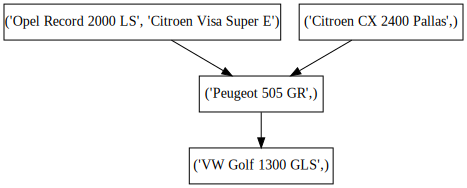

In [10]:
plot = plot_outranking(outranking_matrix)
plot.render()
plot

In [11]:
electre_1=electre1.electre1(dataset, W, scale, c_hat, d_hat)
electre_1

Peugeot 505 GR  Opel Record 2000 LS  \
Peugeot 505 GR                     1.0                  0.0   
Opel Record 2000 LS                1.0                  1.0   
Citroen Visa Super E               1.0                  1.0   
VW Golf 1300 GLS                   0.0                  0.0   
Citroen CX 2400 Pallas             1.0                  0.0   

                        Citroen Visa Super E  VW Golf 1300 GLS  \
Peugeot 505 GR                           0.0                 1   
Opel Record 2000 LS                      1.0                 1   
Citroen Visa Super E                     1.0                 1   
VW Golf 1300 GLS                         0.0                 1   
Citroen CX 2400 Pallas                   0.0                 1   

                        Citroen CX 2400 Pallas  
Peugeot 505 GR                             0.0  
Opel Record 2000 LS                        0.0  
Citroen Visa Super E                       0.0  
VW Golf 1300 GLS                           0.0  
Citroen CX 2400 Pallas                     1.0

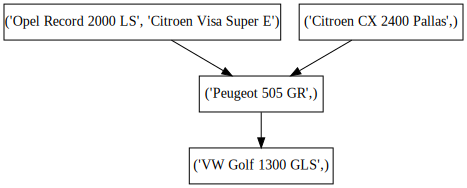

In [12]:
plot = plot_outranking(electre_1)
plot.render()
plot

# Electre 2

## Init 

In [13]:
#Parameters 
alternatives = ["Peugeot 505 GR",
    "Opel Record 2000 LS",
    "Citroen Visa Super E",
    "VW Golf 1300 GLS",
    "Citroen CX 2400 Pallas"]
dataset = DataFrame([
        [1, 2, 1, 5, 2, 2, 4],  # a1
        [3, 5, 3, 5, 3, 3, 3],  # a2
        [3, 5, 3, 5, 3, 2, 2],  # a3
        [1, 2, 2, 5, 1, 1, 1],  # a4
        [1, 1, 3, 5, 4, 1, 5],  # a5
], index=alternatives)
scale = {
    0: QuantitativeScale(1, 5),
    1: QuantitativeScale(1, 5),
    2: QuantitativeScale(1, 5),
    3: QuantitativeScale(1, 5),
    4: QuantitativeScale(1, 5),
    5: QuantitativeScale(1, 5),
    6: QuantitativeScale(1, 5),
}
W = {
    0: 0.780, 1: 1.180, 2: 1.570, 3: 3.140,
    4: 2.350, 5: 0.390, 6: 0.590}
c_hat_sup = 0.85
c_hat_inf = 0.65
d_hat_sup = 0.50
d_hat_inf = 0.25

## concordance and discordance
First let's compute the concordance and discordance as it done in Electre 1

In [14]:
concordance_matrix=electre1.concordance(dataset, W, scale)
discordance_matrix=electre1.discordance(dataset, scale)
print(concordance_matrix)
discordance_matrix

                        Peugeot 505 GR  Opel Record 2000 LS  \
Peugeot 505 GR                   1.000                0.373   
Opel Record 2000 LS              0.941                1.000   
Citroen Visa Super E             0.941                0.902   
VW Golf 1300 GLS                 0.667                0.314   
Citroen CX 2400 Pallas           0.843                0.765   

                        Citroen Visa Super E  VW Golf 1300 GLS  \
Peugeot 505 GR                         0.412             0.843   
Opel Record 2000 LS                    1.000             1.000   
Citroen Visa Super E                   1.000             1.000   
VW Golf 1300 GLS                       0.314             1.000   
Citroen CX 2400 Pallas                 0.765             0.882   

                        Citroen CX 2400 Pallas  
Peugeot 505 GR                           0.549  
Opel Record 2000 LS                      0.706  
Citroen Visa Super E                     0.706  
VW Golf 1300 GLS            

Peugeot 505 GR  Opel Record 2000 LS  \
Peugeot 505 GR                    0.00                 0.75   
Opel Record 2000 LS               0.25                 0.00   
Citroen Visa Super E              0.50                 0.25   
VW Golf 1300 GLS                  0.75                 0.75   
Citroen CX 2400 Pallas            0.25                 1.00   

                        Citroen Visa Super E  VW Golf 1300 GLS  \
Peugeot 505 GR                          0.75              0.25   
Opel Record 2000 LS                     0.00              0.00   
Citroen Visa Super E                    0.00              0.00   
VW Golf 1300 GLS                        0.75              0.00   
Citroen CX 2400 Pallas                  1.00              0.25   

                        Citroen CX 2400 Pallas  
Peugeot 505 GR                            0.50  
Opel Record 2000 LS                       0.50  
Citroen Visa Super E                      0.75  
VW Golf 1300 GLS                          1.00  
Citroen CX 2400 Pallas                    0.00

In [15]:
strong_outranking = electre2.outranking(
    concordance_matrix,
    discordance_matrix,
    c_hat_sup,
    d_hat_inf
)
strong_outranking

Peugeot 505 GR  Opel Record 2000 LS  \
Peugeot 505 GR                     1.0                  0.0   
Opel Record 2000 LS                1.0                  1.0   
Citroen Visa Super E               0.0                  0.0   
VW Golf 1300 GLS                   0.0                  0.0   
Citroen CX 2400 Pallas             0.0                  0.0   

                        Citroen Visa Super E  VW Golf 1300 GLS  \
Peugeot 505 GR                           0.0               0.0   
Opel Record 2000 LS                      1.0               1.0   
Citroen Visa Super E                     1.0               1.0   
VW Golf 1300 GLS                         0.0               1.0   
Citroen CX 2400 Pallas                   0.0               1.0   

                        Citroen CX 2400 Pallas  
Peugeot 505 GR                             0.0  
Opel Record 2000 LS                        0.0  
Citroen Visa Super E                       0.0  
VW Golf 1300 GLS                           0.0  
Citroen CX 2400 Pallas                     1.0

In [16]:
weak_outranking = electre2.outranking(
    concordance_matrix,
    discordance_matrix,
    c_hat_inf,
    d_hat_sup
)
weak_outranking

Peugeot 505 GR  Opel Record 2000 LS  \
Peugeot 505 GR                     1.0                  0.0   
Opel Record 2000 LS                1.0                  1.0   
Citroen Visa Super E               1.0                  0.0   
VW Golf 1300 GLS                   0.0                  0.0   
Citroen CX 2400 Pallas             1.0                  0.0   

                        Citroen Visa Super E  VW Golf 1300 GLS  \
Peugeot 505 GR                           0.0                 1   
Opel Record 2000 LS                      1.0                 1   
Citroen Visa Super E                     1.0                 1   
VW Golf 1300 GLS                         0.0                 1   
Citroen CX 2400 Pallas                   0.0                 1   

                        Citroen CX 2400 Pallas  
Peugeot 505 GR                             0.0  
Opel Record 2000 LS                        0.0  
Citroen Visa Super E                       0.0  
VW Golf 1300 GLS                           0.0  
Citroen CX 2400 Pallas                     1.0

## Distillation
Now let's process the ascending and descending distallation

In [17]:
ascending_distillate = electre2.distillation(
    strong_outranking,
    weak_outranking,
    ascending=True
)
ascending_dist_matrix = electre2.categories_to_outranking(
    ascending_distillate
)
descending_distillate = electre2.distillation(
    strong_outranking,
    weak_outranking
)
descending_dist_matrix = electre2.categories_to_outranking(
    descending_distillate
)

In [18]:
ascending_distillate

[['Opel Record 2000 LS'],
 ['Citroen Visa Super E', 'Citroen CX 2400 Pallas'],
 ['Peugeot 505 GR'],
 ['VW Golf 1300 GLS']]

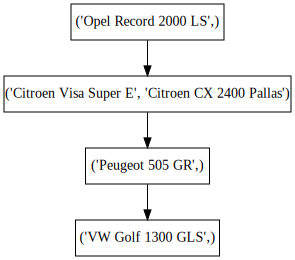

In [19]:
plot_a = plot_outranking(ascending_dist_matrix)
plot_a.render()
plot_a

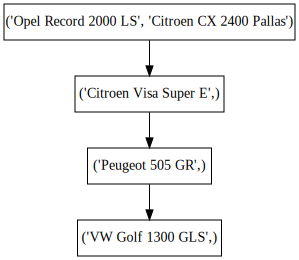

In [20]:
plot_d = plot_outranking(descending_dist_matrix)
plot_d.render()
plot_d

## final ranking
Finally, we can compute and print the final ranking

In [21]:
final_rank = electre2.final_ranking(ascending_dist_matrix, descending_dist_matrix)
final_rank

Citroen CX 2400 Pallas  Citroen Visa Super E  \
Citroen CX 2400 Pallas                       1                     1   
Citroen Visa Super E                         0                     1   
Opel Record 2000 LS                          1                     1   
Peugeot 505 GR                               0                     0   
VW Golf 1300 GLS                             0                     0   

                        Opel Record 2000 LS  Peugeot 505 GR  VW Golf 1300 GLS  
Citroen CX 2400 Pallas                    0               1                 1  
Citroen Visa Super E                      0               1                 1  
Opel Record 2000 LS                       1               1                 1  
Peugeot 505 GR                            0               1                 1  
VW Golf 1300 GLS                          0               0                 1

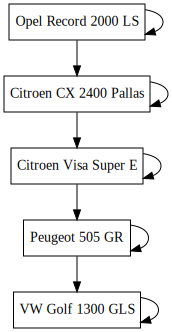

In [22]:
plot_fr = plot_outranking(final_rank)
plot_fr.render()
plot_fr

## Direct methods
We can also compute directly the electre II algorithm if nothing needs to be change. Besides it's possible to reduce the matrix in term of preferences for a proper graph.

In [23]:
final_rank = electre2.electre_ii(dataset, 
        W,
        scale,
        c_hat_sup,
        c_hat_inf,
        d_hat_sup,
        d_hat_inf,
)
final_rank

Citroen CX 2400 Pallas  Citroen Visa Super E  \
Citroen CX 2400 Pallas                       1                     1   
Citroen Visa Super E                         0                     1   
Opel Record 2000 LS                          1                     1   
Peugeot 505 GR                               0                     0   
VW Golf 1300 GLS                             0                     0   

                        Opel Record 2000 LS  Peugeot 505 GR  VW Golf 1300 GLS  
Citroen CX 2400 Pallas                    0               1                 1  
Citroen Visa Super E                      0               1                 1  
Opel Record 2000 LS                       1               1                 1  
Peugeot 505 GR                            0               1                 1  
VW Golf 1300 GLS                          0               0                 1

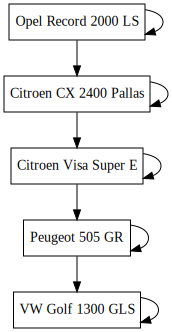

In [24]:
electre_2=electre2.electre_ii(dataset, 
    W,
    scale,
    c_hat_sup,
    c_hat_inf,
    d_hat_sup,
    d_hat_inf,
)
plot_e2 = plot_outranking(electre_2)
plot_e2.render()
plot_e2

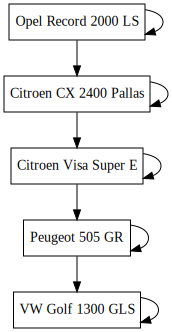

In [25]:
plot_e2 = plot_outranking(final_rank)
plot_e2.render()
plot_e2

# Electre 3

## init

In [26]:
from pandas import DataFrame, Series
import mcda.outranking.electre3 as electre3
import mcda.outranking.electre2 as electre2
from mcda.core.performance_table import *
from mcda.core.scales import *
alternatives = ["Peugeot 505 GR",
    "Opel Record 2000 LS",
    "Citroen Visa Super E",
    "VW Golf 1300 GLS",
    "Citroen CX 2400 Pallas",
    "Renault Scenic"]
dataset = DataFrame([
        [8.84, 8.79, 6.43, 6.95],
        [8.57, 8.51, 5.47, 6.91],
        [7.76, 7.75, 5.34, 8.76],
        [7.97, 9.12, 5.93, 8.09],
        [9.03, 8.97, 8.19, 8.10],
        [7.41, 7.87, 6.77, 7.23],
    ], index=alternatives)
scales = {
    0: QuantitativeScale(7, 10),
    1: QuantitativeScale(7, 10),
    2: QuantitativeScale(5, 9),
    3: QuantitativeScale(6, 9),
}
W = {0: 9.00, 1: 8.24, 2: 5.98, 3: 8.48}
P = {0: 0.50, 1: 0.50, 2: 0.50, 3: 0.50}
I = {0: 0.30, 1: 0.30, 2: 0.30, 3: 0.30}
V = {0: 0.70, 1: 0.70, 2: 0.70, 3: 0.70}

## concordance

In [27]:
electre3.concordance(dataset,W,scales,P,I)

Peugeot 505 GR  Opel Record 2000 LS  \
Peugeot 505 GR                1.000000             1.000000   
Opel Record 2000 LS           0.811356             1.000000   
Citroen Visa Super E          0.267508             0.456151   
VW Golf 1300 GLS              0.527445             0.716088   
Citroen CX 2400 Pallas        1.000000             1.000000   
Renault Scenic                0.456151             0.456151   

                        Citroen Visa Super E  VW Golf 1300 GLS  \
Peugeot 505 GR                      0.732492          0.693502   
Opel Record 2000 LS                 0.732492          0.321640   
Citroen Visa Super E                1.000000          0.551420   
VW Golf 1300 GLS                    0.732492          1.000000   
Citroen CX 2400 Pallas              0.732492          1.000000   
Renault Scenic                      0.661514          0.188644   

                        Citroen CX 2400 Pallas  Renault Scenic  
Peugeot 505 GR                        0.543849        0.962271  
Opel Record 2000 LS                   0.108770        0.784606  
Citroen Visa Super E                  0.267508        0.811356  
VW Golf 1300 GLS                      0.527445        0.811356  
Citroen CX 2400 Pallas                1.000000        1.000000  
Renault Scenic                        0.000000        1.000000

## discordance

In [28]:
d = electre3.discordance(dataset,scales,P,V)

In [29]:
for i in d.index:
    for j in d.columns:
        print(d.loc[i, j].tolist())

[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 1, 1]
[0, 0, 0, 0]
[0, 0, 1, 0]
[0, 0, 0, 0]
[0, 0, 0, 1]
[0.0, 0.5499999999999973, 0.0, 1.0]
[0, 0, 1, 1]
[0, 0, 1, 0]
[1, 1, 1, 0]
[1, 1, 0, 0]
[0, 0, 0, 0]
[0.0, 1.0, 0.4499999999999994, 0.0]
[1, 1, 1, 0]
[0, 0, 1, 0]
[1, 0, 0, 0]
[0.5000000000000028, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.8499999999999999]
[0, 0, 0, 0]
[1, 0, 1, 0]
[0, 0, 1, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0.0, 0.0, 0.0, 0.8000000000000009]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[1, 1, 0, 0]
[1.0, 0.6999999999999985, 0.0, 0.0]
[0, 0, 0, 1]
[0.2999999999999981, 1.0, 0.0, 1.0]
[1, 1, 1, 1]
[0, 0, 0, 0]


## credibility

In [30]:
electre3.credibility(dataset,W,scales,P,I,V)

Peugeot 505 GR  Opel Record 2000 LS  \
Peugeot 505 GR                     1.0             1.000000   
Opel Record 2000 LS                0.0             1.000000   
Citroen Visa Super E               0.0             0.000000   
VW Golf 1300 GLS                   0.0             0.716088   
Citroen CX 2400 Pallas             1.0             1.000000   
Renault Scenic                     0.0             0.000000   

                        Citroen Visa Super E  VW Golf 1300 GLS  \
Peugeot 505 GR                      0.000000               0.0   
Opel Record 2000 LS                 0.000000               0.0   
Citroen Visa Super E                1.000000               0.0   
VW Golf 1300 GLS                    0.410731               1.0   
Citroen CX 2400 Pallas              0.547642               1.0   
Renault Scenic                      0.000000               0.0   

                        Citroen CX 2400 Pallas  Renault Scenic  
Peugeot 505 GR                             0.0        0.962271  
Opel Record 2000 LS                        0.0        0.000000  
Citroen Visa Super E                       0.0        0.000000  
VW Golf 1300 GLS                           0.0        0.000000  
Citroen CX 2400 Pallas                     1.0        1.000000  
Renault Scenic                             0.0        1.000000

## qualification

In [31]:
qual = electre3.qualification(dataset, W, scales, P, I, V)
qual

Peugeot 505 GR            1
Opel Record 2000 LS      -2
Citroen Visa Super E      0
VW Golf 1300 GLS         -1
Citroen CX 2400 Pallas    4
Renault Scenic           -2
dtype: int64

## Distillation

In [32]:
descending_distillate = electre3.distillation(
    dataset,
    W,
    scales,
    P,
    I,
    V
)
descending_distillate

[['Citroen CX 2400 Pallas'],
 ['Peugeot 505 GR'],
 ['Opel Record 2000 LS',
  'Citroen Visa Super E',
  'VW Golf 1300 GLS',
  'Renault Scenic']]

In [33]:
ascending_distillate = electre3.distillation(
    dataset,
    W,
    scales,
    P,
    I,
    V,
    ascending=True
)
ascending_distillate

[['Citroen Visa Super E', 'Citroen CX 2400 Pallas'],
 ['Peugeot 505 GR', 'VW Golf 1300 GLS'],
 ['Opel Record 2000 LS', 'Renault Scenic']]

In [34]:
ascending_dist_matrix = electre2.categories_to_outranking(ascending_distillate)
ascending_dist_matrix

Citroen Visa Super E  Citroen CX 2400 Pallas  \
Citroen Visa Super E                       1                       1   
Citroen CX 2400 Pallas                     1                       1   
Peugeot 505 GR                             0                       0   
VW Golf 1300 GLS                           0                       0   
Opel Record 2000 LS                        0                       0   
Renault Scenic                             0                       0   

                        Peugeot 505 GR  VW Golf 1300 GLS  Opel Record 2000 LS  \
Citroen Visa Super E                 1                 1                    1   
Citroen CX 2400 Pallas               1                 1                    1   
Peugeot 505 GR                       1                 1                    1   
VW Golf 1300 GLS                     1                 1                    1   
Opel Record 2000 LS                  0                 0                    1   
Renault Scenic                       0                 0                    1   

                        Renault Scenic  
Citroen Visa Super E                 1  
Citroen CX 2400 Pallas               1  
Peugeot 505 GR                       1  
VW Golf 1300 GLS                     1  
Opel Record 2000 LS                  1  
Renault Scenic                       1

In [35]:
descending_dist_matrix = electre2.categories_to_outranking(descending_distillate)
descending_dist_matrix

Citroen CX 2400 Pallas  Peugeot 505 GR  \
Citroen CX 2400 Pallas                       1               1   
Peugeot 505 GR                               0               1   
Opel Record 2000 LS                          0               0   
Citroen Visa Super E                         0               0   
VW Golf 1300 GLS                             0               0   
Renault Scenic                               0               0   

                        Opel Record 2000 LS  Citroen Visa Super E  \
Citroen CX 2400 Pallas                    1                     1   
Peugeot 505 GR                            1                     1   
Opel Record 2000 LS                       1                     1   
Citroen Visa Super E                      1                     1   
VW Golf 1300 GLS                          1                     1   
Renault Scenic                            1                     1   

                        VW Golf 1300 GLS  Renault Scenic  
Citroen CX 2400 Pallas                 1               1  
Peugeot 505 GR                         1               1  
Opel Record 2000 LS                    1               1  
Citroen Visa Super E                   1               1  
VW Golf 1300 GLS                       1               1  
Renault Scenic                         1               1

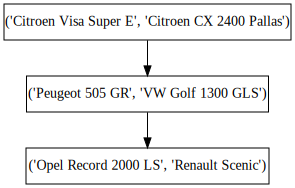

In [36]:
plot_a = plot_outranking(ascending_dist_matrix)
plot_a.render()
plot_a

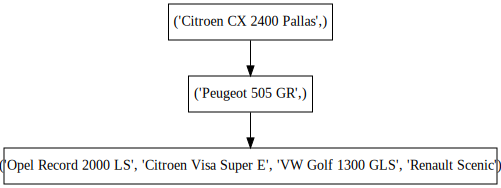

In [37]:
plot_d = plot_outranking(descending_dist_matrix)
plot_d.render()
plot_d

## Final ranking 

In [38]:
ranking = electre2.final_ranking(
    ascending_dist_matrix, 
    descending_dist_matrix
)
ranking

Citroen CX 2400 Pallas  Citroen Visa Super E  \
Citroen CX 2400 Pallas                       1                     1   
Citroen Visa Super E                         0                     1   
Opel Record 2000 LS                          0                     0   
Peugeot 505 GR                               0                     0   
Renault Scenic                               0                     0   
VW Golf 1300 GLS                             0                     0   

                        Opel Record 2000 LS  Peugeot 505 GR  Renault Scenic  \
Citroen CX 2400 Pallas                    1               1               1   
Citroen Visa Super E                      1               0               1   
Opel Record 2000 LS                       1               0               1   
Peugeot 505 GR                            1               1               1   
Renault Scenic                            1               0               1   
VW Golf 1300 GLS                          1               0               1   

                        VW Golf 1300 GLS  
Citroen CX 2400 Pallas                 1  
Citroen Visa Super E                   1  
Opel Record 2000 LS                    0  
Peugeot 505 GR                         1  
Renault Scenic                         0  
VW Golf 1300 GLS                       1

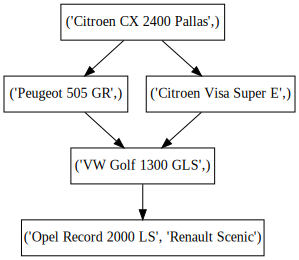

In [39]:
plot_fr = plot_outranking(ranking)
plot_fr.render()
plot_fr

## Direct methods
We can also compute directly the electre III algorithm if nothing needs to be change. Besides it's possible to reduce the matrix in term of preferences for a proper graph.

In [40]:
final_rank = electre3.electre_iii(dataset,
        W,
        scales,
        P,
        I,
        V
)
final_rank.loc[alternatives, alternatives]

Peugeot 505 GR  Opel Record 2000 LS  \
Peugeot 505 GR                       1                    1   
Opel Record 2000 LS                  0                    1   
Citroen Visa Super E                 0                    1   
VW Golf 1300 GLS                     0                    1   
Citroen CX 2400 Pallas               1                    1   
Renault Scenic                       0                    1   

                        Citroen Visa Super E  VW Golf 1300 GLS  \
Peugeot 505 GR                             0                 1   
Opel Record 2000 LS                        0                 0   
Citroen Visa Super E                       1                 1   
VW Golf 1300 GLS                           0                 1   
Citroen CX 2400 Pallas                     1                 1   
Renault Scenic                             0                 0   

                        Citroen CX 2400 Pallas  Renault Scenic  
Peugeot 505 GR                               0               1  
Opel Record 2000 LS                          0               1  
Citroen Visa Super E                         0               1  
VW Golf 1300 GLS                             0               1  
Citroen CX 2400 Pallas                       1               1  
Renault Scenic                               0               1

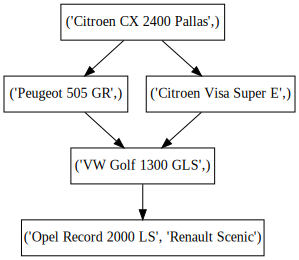

In [41]:
plot_e3 = plot_outranking(final_rank)
plot_e3.render()
plot_e3

# Electre TRI

## Init

In [42]:
from pandas import DataFrame
from mcda.core.scales import *
import mcda.outranking.electre_tri as electre_tri

In [43]:
dataset = DataFrame([
    [0.720, 3.560, 1.340, 0.62, 44.340],
    [0.8, 3.940, 1.430, 0.74, 36.360],
    [0.760, 3.630, 1.380, 0.89, 48.750],
    [0.780, 3.740, 1.450, 0.72, 42.130],
    [0.740, 3.540, 1.370, 0.73, 36.990],
    [0.690, 3.740, 1.450, 0.84, 42.430],
    [0.7, 3.280, 1.280, 0.83, 47.430],
    [0.860, 3.370, 1.150, 0.8, 80.790],
])
w = {0: 30, 1: 30, 2: 20, 3: 10, 4: 10}
scales = {
    0: QuantitativeScale(0, 1),
    1: QuantitativeScale(3, 4),
    2: QuantitativeScale(1, 2),
    3: QuantitativeScale(0, 1),
    4: QuantitativeScale(30, 100),
}
P = {0: 0.05, 1: 0.1, 2: 0.05, 3: 0.1, 4: 8}
Q = {0: 0.02, 1: 0.05, 2: 0.02, 3: 0.05, 4: 2}
V = {0: 0.15, 1: 0.6, 2: 0.25, 3: 0.25, 4: 15}
profiles = DataFrame([
    [0.750, 3.500, 1.300, 0.730, 42.00],
    [0.800, 3.700, 1.370, 0.790, 43.000],
])
lambda_=0.7

## Optimistic Procedure

In [44]:
electre_tri.exploitation_procedure(
    dataset,
    profiles,
    w,
    scales,
    P,
    Q,
    V,
    lambda_
)

defaultdict(list, {0: [6], 1: [0, 2, 4], 2: [1, 3, 5], -1: [7]})

## Pessimistic Procedure

In [45]:
electre_tri.exploitation_procedure(
    dataset,
    profiles,
    w,
    scales,
    P,
    Q,
    V,
    lambda_,
    pessimistic=True
)

defaultdict(list, {2: [1], 1: [2, 3, 5], 0: [0, 4, 6], -1: [7]})

## Direct method

In [46]:
electre_tri.electre_tri(dataset,
    profiles,
    w,
    scales,
    P,
    Q,
    V,
    lambda_,
)

(defaultdict(list, {0: [6], 1: [0, 2, 4], 2: [1, 3, 5], -1: [7]}),
 defaultdict(list, {2: [1], 1: [2, 3, 5], 0: [0, 4, 6], -1: [7]}))